In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys, os
sys.path.append(os.path.abspath(".."))
from analysis.load_data import load_dataset

names, platforms, years, genres, publishers, na_sales, eu_sales, jp_sales, other_sales, global_sales = load_dataset()

/Users/busrauz/Desktop/ai-journey-bootcamp/week1/day1-numpy-video-game-sales/analysis/load_data.py:5: ConversionWarning: Some errors were detected !
    Line #945 (got 12 columns instead of 11)
    Line #1093 (got 12 columns instead of 11)
    Line #1628 (got 12 columns instead of 11)
    Line #1835 (got 14 columns instead of 11)
    Line #2411 (got 12 columns instead of 11)
    Line #2890 (got 12 columns instead of 11)
    Line #2920 (got 13 columns instead of 11)
    Line #3051 (got 12 columns instead of 11)
    Line #3091 (got 14 columns instead of 11)
    Line #3218 (got 13 columns instead of 11)
    Line #3329 (got 14 columns instead of 11)
    Line #3413 (got 14 columns instead of 11)
    Line #3465 (got 13 columns instead of 11)
    Line #3525 (got 12 columns instead of 11)
    Line #3552 (got 2 columns instead of 11)
    Line #3573 (got 12 columns instead of 11)
    Line #3758 (got 12 columns instead of 11)
    Line #3906 (got 13 columns instead of 11)
    Line #3913 (got 13 co

In [19]:
cleaned_years = years[~np.isnan(years)]

unq_years = np.sort(np.unique(cleaned_years))
sales = [[int(year), float(sum(global_sales[years == year])), float(sum(na_sales[years == year])),float(sum(eu_sales[years == year])),float(sum(jp_sales[years == year]))] for year in unq_years]
sales.insert(0, ["Year", "Global", "NA", "EU", "JP"])
global_sale_sums = np.array(sales)[1:, 1].astype(np.float64)
max_idx = np.argmax(global_sale_sums)
peak_year = int(np.array(sales)[1:,0][max_idx])
peak_value = float(np.array(sales)[1:,1][max_idx])
peak_value

677.6899999999952

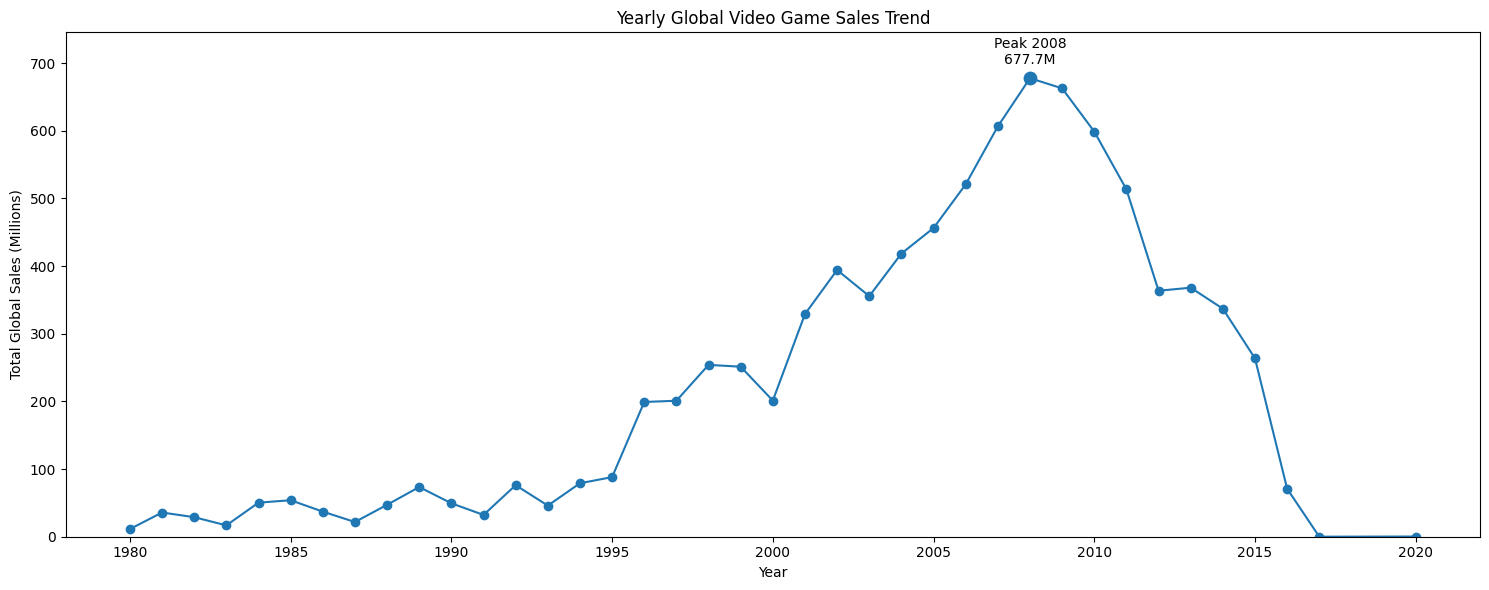

In [21]:
fig, ax = plt.subplots(1,figsize=(15, 6))
ax.plot(unq_years, global_sale_sums, marker="o")
ax.set_xlabel("Year")
ax.set_ylabel("Total Global Sales (Millions)")
ax.set_title("Yearly Global Video Game Sales Trend")
ax.set_ylim(0, global_sale_sums.max() * 1.1)

# Peak yılı vurgula
ax.scatter([peak_year], [peak_value], s=80)
ax.text(peak_year, peak_value + peak_value * 0.03,
        f"Peak {peak_year}\n{peak_value:.1f}M",
        ha="center")

plt.tight_layout()
plt.show()